# Deep Neural Network

In [104]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
from sklearn.datasets import make_moons
from keras.layers import Dropout

In [106]:
dataframe1 = pd.read_table('wifi_localization.txt', delim_whitespace=True, names=('wifi_1','wifi_2','wifi_3','wifi_4','wifi_5','wifi_6','wifi_7','Room'))
dataframe1.head()

,wifi_1,wifi_2,wifi_3,wifi_4,wifi_5,wifi_6,wifi_7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [107]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
wifi_1    2000 non-null int64
wifi_2    2000 non-null int64
wifi_3    2000 non-null int64
wifi_4    2000 non-null int64
wifi_5    2000 non-null int64
wifi_6    2000 non-null int64
wifi_7    2000 non-null int64
Room      2000 non-null int64
dtypes: int64(8)
memory usage: 125.1 KB


In [108]:
dataframe1['Room'].unique()

array([1, 2, 3, 4], dtype=int64)

In [109]:
dataframe1['Room']=dataframe1['Room'].astype('object')

In [110]:
#split Training and Testing
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

X , y = dataframe1.loc[:, dataframe1.columns != 'Room'] ,dataframe1.loc[:, dataframe1.columns == 'Room']
trainX, testX, trainy, testy = train_test_split(X, y, random_state = 0,train_size = 0.7, test_size = 0.3)


In [111]:
set(y.Room)

{1, 2, 3, 4}

In [112]:
trainX=np.array(trainX)
trainy=np.array(trainy)
testy=np.array(testy)
testX=np.array(testX)

In [113]:
print(trainX.shape,testX.shape)

(1400, 7) (600, 7)


In [114]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(trainy)
trainy = encoder.transform(trainy)
# convert integers to dummy variables (i.e. one hot encoded)
trainy = np_utils.to_categorical(trainy)

C:\Users\ved deo\Anaconda3\envs\deep\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ved deo\Anaconda3\envs\deep\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(testy)
testy = encoder.transform(testy)
# convert integers to dummy variables (i.e. one hot encoded)
testy = np_utils.to_categorical(testy)

In [116]:
testy

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [117]:
# define model
model = Sequential()
model.add(Dense(340, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [118]:
#compile model with SGD
from keras.optimizers import SGD
sgd = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [119]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
mc = ModelCheckpoint('best_model_mlp.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


In [120]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=1, callbacks=[es, mc])

Train on 1400 samples, validate on 600 samples
Epoch 1/200
1400/1400 [==============================] - 0s 320us/step - loss: 2.5381 - accuracy: 0.2571 - val_loss: 1.3873 - val_accuracy: 0.2317
Epoch 2/200
1400/1400 [==============================] - 0s 89us/step - loss: 1.3866 - accuracy: 0.2579 - val_loss: 1.3879 - val_accuracy: 0.2317
Epoch 3/200
 640/1400 [============>.................] - ETA: 0s - loss: 1.3885 - accuracy: 0.2234

C:\Users\ved deo\Anaconda3\envs\deep\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1400/1400 [==============================] - 0s 114us/step - loss: 1.3874 - accuracy: 0.2393 - val_loss: 1.3880 - val_accuracy: 0.2317
Epoch 4/200
1400/1400 [==============================] - 0s 122us/step - loss: 1.3874 - accuracy: 0.2579 - val_loss: 1.3883 - val_accuracy: 0.2317
Epoch 5/200
1400/1400 [==============================] - 0s 121us/step - loss: 1.3868 - accuracy: 0.2450 - val_loss: 1.3864 - val_accuracy: 0.2517
Epoch 6/200
1400/1400 [==============================] - 0s 120us/step - loss: 1.3867 - accuracy: 0.2557 - val_loss: 1.3873 - val_accuracy: 0.2317
Epoch 7/200
1400/1400 [==============================] - 0s 131us/step - loss: 1.3868 - accuracy: 0.2579 - val_loss: 1.3880 - val_accuracy: 0.2317
Epoch 8/200
1400/1400 [==============================] - 0s 116us/step - loss: 1.3865 - accuracy: 0.2579 - val_loss: 1.3876 - val_accuracy: 0.2317
Epoch 9/200
1400/1400 [==============================] - 0s 119us/step - loss: 1.3869 - accuracy: 0.2357 - val_loss: 1.3870 - val_

In [121]:
# load the saved model
#saved_model = load_model('best_model_mlp.h5')
saved_model = model

In [122]:
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.258, Test: 0.232


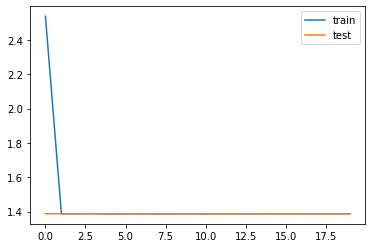

In [123]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [124]:
train_predicted=saved_model.predict(trainX)
train_predicted

array([[0.24455766, 0.2503374 , 0.24961333, 0.25549158],
       [0.24455766, 0.2503374 , 0.24961333, 0.25549158],
       [0.24455766, 0.2503374 , 0.24961333, 0.25549158],
       ...,
       [0.24455766, 0.2503374 , 0.24961333, 0.25549158],
       [0.24455766, 0.2503374 , 0.24961333, 0.25549158],
       [0.24455766, 0.2503374 , 0.24961333, 0.25549158]], dtype=float32)

In [125]:
trainy

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [126]:
test_predicted=saved_model.predict(testX)
test_predicted

array([[0.24455766, 0.2503374 , 0.24961333, 0.25549158],
       [0.24455766, 0.2503374 , 0.24961333, 0.25549158],
       [0.24455766, 0.2503374 , 0.24961333, 0.25549158],
       ...,
       [0.24455766, 0.2503374 , 0.24961333, 0.25549158],
       [0.24455766, 0.2503374 , 0.24961333, 0.25549158],
       [0.24455766, 0.2503374 , 0.24961333, 0.25549158]], dtype=float32)

In [127]:
testy

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [128]:
#Confusion Matrix for Training
from sklearn import metrics
confusion = metrics.confusion_matrix(trainy.argmax(axis=1), train_predicted.argmax(axis=1))
print(confusion)

[[  0   0   0 343]
 [  0   0   0 349]
 [  0   0   0 347]
 [  0   0   0 361]]


In [129]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(trainy.argmax(axis=1), train_predicted.argmax(axis=1)))

0.25785714285714284


In [130]:
#Confusion Matrix for Testing
from sklearn import metrics
confusion1 = metrics.confusion_matrix(testy.argmax(axis=1), test_predicted.argmax(axis=1))
print(confusion1)

[[  0   0   0 157]
 [  0   0   0 151]
 [  0   0   0 153]
 [  0   0   0 139]]


In [131]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(testy.argmax(axis=1), test_predicted.argmax(axis=1)))

0.23166666666666666


#### We can also use pycm for the confusion matrix

In [132]:
FP = confusion1.sum(axis=0) - np.diag(confusion1)  
FN = confusion1.sum(axis=1) - np.diag(confusion1)
TP = np.diag(confusion1)
TN = confusion1.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print(TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC)

[0. 0. 0. 1.]
[1. 1. 1. 0.]
[0.73833333 0.74833333 0.745      0.23166667]


C:\Users\ved deo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\Users\ved deo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\Users\ved deo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


## With Regularization Parameter + Drop Out + ADAM

In [27]:
# define model with Regularization and drop out for stopping Overfitting
from keras import regularizers
model_adam = Sequential()
model_adam.add(Dense(300,activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model_adam.add(Dropout(0.6, noise_shape=None, seed=None))
model_adam.add(Dense(200, activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model_adam.add(Dense(50, activation='relu'))
model_adam.add(Dense(4, activation='softmax'))


In [28]:
# Compiling Model with adam
model_adam.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [29]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
mc = ModelCheckpoint('best_model_mlp_reg.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


In [30]:
# fit model
# batch size should always in multiple of 2.
history = model_adam.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=1, callbacks=[es, mc],batch_size=128)

Train on 1400 samples, validate on 600 samples
Epoch 1/200
1400/1400 [==============================] - 0s 248us/step - loss: 42.5630 - accuracy: 0.2800 - val_loss: 36.1958 - val_accuracy: 0.3450
Epoch 2/200
1400/1400 [==============================] - 0s 53us/step - loss: 33.2981 - accuracy: 0.3486 - val_loss: 30.1154 - val_accuracy: 0.2517
Epoch 3/200
1400/1400 [==============================] - 0s 42us/step - loss: 28.3948 - accuracy: 0.3771 - val_loss: 25.3428 - val_accuracy: 0.5367
Epoch 4/200
 128/1400 [=>............................] - ETA: 0s - loss: 26.1516 - accuracy: 0.4766

C:\Users\ved deo\Anaconda3\envs\deep\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1400/1400 [==============================] - 0s 43us/step - loss: 24.7030 - accuracy: 0.4507 - val_loss: 22.3478 - val_accuracy: 0.6583
Epoch 5/200
1400/1400 [==============================] - 0s 34us/step - loss: 21.6568 - accuracy: 0.4686 - val_loss: 19.6482 - val_accuracy: 0.9383
Epoch 6/200
1400/1400 [==============================] - 0s 70us/step - loss: 19.0722 - accuracy: 0.5414 - val_loss: 17.4913 - val_accuracy: 0.7950
Epoch 7/200
1400/1400 [==============================] - 0s 44us/step - loss: 16.8981 - accuracy: 0.5764 - val_loss: 15.5149 - val_accuracy: 0.9200
Epoch 8/200
1400/1400 [==============================] - 0s 40us/step - loss: 15.1482 - accuracy: 0.6071 - val_loss: 13.9287 - val_accuracy: 0.9483
Epoch 9/200
1400/1400 [==============================] - 0s 44us/step - loss: 13.6638 - accuracy: 0.6386 - val_loss: 12.6510 - val_accuracy: 0.9717
Epoch 10/200
1400/1400 [==============================] - 0s 38us/step - loss: 12.5894 - accuracy: 0.6729 - val_loss: 11.800

Epoch 60/200
1400/1400 [==============================] - 0s 42us/step - loss: 1.4481 - accuracy: 0.9429 - val_loss: 1.3702 - val_accuracy: 0.9683
Epoch 61/200
1400/1400 [==============================] - 0s 32us/step - loss: 1.4196 - accuracy: 0.9264 - val_loss: 1.3114 - val_accuracy: 0.9750
Epoch 62/200
1400/1400 [==============================] - 0s 48us/step - loss: 1.3589 - accuracy: 0.9486 - val_loss: 1.2754 - val_accuracy: 0.9733
Epoch 63/200
1400/1400 [==============================] - 0s 62us/step - loss: 1.3325 - accuracy: 0.9429 - val_loss: 1.2334 - val_accuracy: 0.9767
Epoch 64/200
1400/1400 [==============================] - 0s 38us/step - loss: 1.2838 - accuracy: 0.9464 - val_loss: 1.2094 - val_accuracy: 0.9733
Epoch 65/200
1400/1400 [==============================] - 0s 63us/step - loss: 1.2758 - accuracy: 0.9393 - val_loss: 1.1917 - val_accuracy: 0.9683
Epoch 66/200
1400/1400 [==============================] - 0s 48us/step - loss: 1.2405 - accuracy: 0.9350 - val_loss: 1

1400/1400 [==============================] - 0s 44us/step - loss: 0.4291 - accuracy: 0.9529 - val_loss: 0.3734 - val_accuracy: 0.9817
Epoch 171/200
1400/1400 [==============================] - 0s 38us/step - loss: 0.4472 - accuracy: 0.9493 - val_loss: 0.3856 - val_accuracy: 0.9700
Epoch 172/200
1400/1400 [==============================] - 0s 62us/step - loss: 0.4427 - accuracy: 0.9493 - val_loss: 0.3720 - val_accuracy: 0.9800
Epoch 173/200
1400/1400 [==============================] - 0s 34us/step - loss: 0.4465 - accuracy: 0.9529 - val_loss: 0.3958 - val_accuracy: 0.9683
Epoch 174/200
1400/1400 [==============================] - 0s 38us/step - loss: 0.4483 - accuracy: 0.9400 - val_loss: 0.3700 - val_accuracy: 0.9817
Epoch 175/200
1400/1400 [==============================] - 0s 63us/step - loss: 0.4748 - accuracy: 0.9371 - val_loss: 0.3966 - val_accuracy: 0.9667
Epoch 176/200
1400/1400 [==============================] - 0s 127us/step - loss: 0.4529 - accuracy: 0.9443 - val_loss: 0.3778 

In [31]:
# load the saved model
#saved_model = load_model('best_model_mlp_reg.h5')
saved_model = model_adam

In [32]:
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.975, Test: 0.980


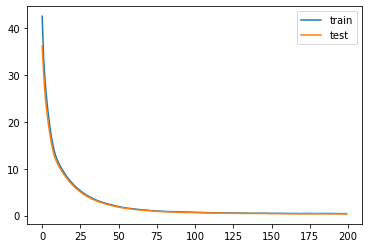

In [33]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [34]:
# Confusion matrix

In [35]:
train_predicted=saved_model.predict(trainX)
test_predicted=saved_model.predict(testX)

#Confusion Matrix for Training
from sklearn import metrics
confusion = metrics.confusion_matrix(trainy.argmax(axis=1), train_predicted.argmax(axis=1))
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(trainy.argmax(axis=1), train_predicted.argmax(axis=1)))

#Confusion Matrix for Testing
from sklearn import metrics
confusion1 = metrics.confusion_matrix(testy.argmax(axis=1), test_predicted.argmax(axis=1))
print(confusion1)

# Let's check the overall accuracy.
print(metrics.accuracy_score(testy.argmax(axis=1), test_predicted.argmax(axis=1)))

[[341   0   1   1]
 [  0 339  10   0]
 [  4  16 326   1]
 [  0   0   2 359]]
0.975
[[156   0   1   0]
 [  0 146   5   0]
 [  1   4 147   1]
 [  0   0   0 139]]
0.98


In [36]:
FP = confusion1.sum(axis=0) - np.diag(confusion1)  
FN = confusion1.sum(axis=1) - np.diag(confusion1)
TP = np.diag(confusion1)
TN = confusion1.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print(TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC)

[0.99363057 0.96688742 0.96078431 1.        ]
[0.99774266 0.99109131 0.98657718 0.9978308 ]
[0.99666667 0.985      0.98       0.99833333]


In [37]:
################################################################################################################################
################################################################################################################################
################################################################################################################################

# Deep Recurrent Network

### Long Short Term Memory Network

In [38]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
from sklearn.datasets import make_moons
from keras.layers import Dropout
from keras.layers import LSTM

In [39]:
#split Training and Testing
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

X , y = dataframe1.loc[:, dataframe1.columns != 'Room'] ,dataframe1.loc[:, dataframe1.columns == 'Room']
trainX, testX, trainy, testy = train_test_split(X, y, random_state = 0,train_size = 0.7, test_size = 0.3)


In [40]:
ln=len(trainX.columns)

In [41]:
trainX=np.array(trainX)
trainy=np.array(trainy)
testy=np.array(testy)
testX=np.array(testX)


In [42]:
trainX = trainX.reshape(len(trainX),1,ln)
testX = testX.reshape(len(testX),1,ln)
trainy = trainy.reshape(len(trainy),1)
testy = testy.reshape(len(testy),1)

In [43]:
testX.shape

(600, 1, 7)

In [44]:
testy.shape

(600, 1)

In [45]:
trainX.shape

(1400, 1, 7)

In [46]:
trainy.shape

(1400, 1)

In [47]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(trainy)
trainy = encoder.transform(trainy)
# convert integers to dummy variables (i.e. one hot encoded)
trainy = np_utils.to_categorical(trainy)

C:\Users\ved deo\Anaconda3\envs\deep\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ved deo\Anaconda3\envs\deep\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(testy)
testy = encoder.transform(testy)
# convert integers to dummy variables (i.e. one hot encoded)
testy = np_utils.to_categorical(testy)

In [49]:
# define model
model_lstm = Sequential()
model_lstm.add(LSTM(300,activation='relu'))
model_lstm.add(Dense(200, activation='relu'))
model_lstm.add(Dense(50, activation='relu'))
model_lstm.add(Dense(4, activation='softmax'))

In [50]:
#compile model with SGD
from keras.optimizers import SGD
sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
model_lstm.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [51]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
mc = ModelCheckpoint('best_model_lstm.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


In [52]:
# fit model
history = model_lstm.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=1, callbacks=[es, mc])



Train on 1400 samples, validate on 600 samples
Epoch 1/200
1400/1400 [==============================] - 1s 789us/step - loss: nan - accuracy: 0.2464 - val_loss: nan - val_accuracy: 0.2617
Epoch 2/200
 544/1400 [==========>...................] - ETA: 0s - loss: nan - accuracy: 0.2537

C:\Users\ved deo\Anaconda3\envs\deep\lib\site-packages\keras\callbacks\callbacks.py:820: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
C:\Users\ved deo\Anaconda3\envs\deep\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1400/1400 [==============================] - 0s 347us/step - loss: nan - accuracy: 0.2450 - val_loss: nan - val_accuracy: 0.2617
Epoch 3/200
1400/1400 [==============================] - 0s 336us/step - loss: nan - accuracy: 0.2450 - val_loss: nan - val_accuracy: 0.2617
Epoch 4/200
1400/1400 [==============================] - 0s 329us/step - loss: nan - accuracy: 0.2450 - val_loss: nan - val_accuracy: 0.2617
Epoch 5/200
1400/1400 [==============================] - 0s 313us/step - loss: nan - accuracy: 0.2450 - val_loss: nan - val_accuracy: 0.2617
Epoch 6/200
1400/1400 [==============================] - 0s 344us/step - loss: nan - accuracy: 0.2450 - val_loss: nan - val_accuracy: 0.2617
Epoch 7/200
1400/1400 [==============================] - 1s 392us/step - loss: nan - accuracy: 0.2450 - val_loss: nan - val_accuracy: 0.2617
Epoch 8/200
1400/1400 [==============================] - 0s 347us/step - loss: nan - accuracy: 0.2450 - val_loss: nan - val_accuracy: 0.2617
Epoch 9/200
1400/1400 [==

In [53]:
# load the saved model
#saved_model = load_model('best_model_lstm.h5')
saved_model = model_lstm

In [54]:
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 0.245, Test: 0.262


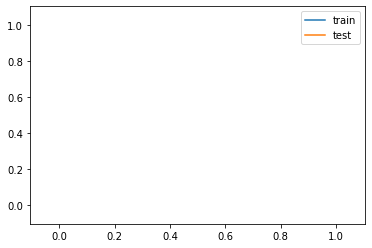

In [55]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [56]:
# Confusion Matrix
train_predicted=saved_model.predict(trainX)
test_predicted=saved_model.predict(testX)

#Confusion Matrix for Training
from sklearn import metrics
confusion = metrics.confusion_matrix(trainy.argmax(axis=1), train_predicted.argmax(axis=1))
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(trainy.argmax(axis=1), train_predicted.argmax(axis=1)))

#Confusion Matrix for Testing
from sklearn import metrics
confusion1 = metrics.confusion_matrix(testy.argmax(axis=1), test_predicted.argmax(axis=1))
print(confusion1)

# Let's check the overall accuracy.
print(metrics.accuracy_score(testy.argmax(axis=1), test_predicted.argmax(axis=1)))

[[343   0   0   0]
 [349   0   0   0]
 [347   0   0   0]
 [361   0   0   0]]
0.245
[[157   0   0   0]
 [151   0   0   0]
 [153   0   0   0]
 [139   0   0   0]]
0.26166666666666666


In [57]:
FP = confusion1.sum(axis=0) - np.diag(confusion1)  
FN = confusion1.sum(axis=1) - np.diag(confusion1)
TP = np.diag(confusion1)
TN = confusion1.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print(TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC)

[1. 0. 0. 0.]
[0. 1. 1. 1.]
[0.26166667 0.74833333 0.745      0.76833333]


C:\Users\ved deo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\Users\ved deo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\Users\ved deo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


### With Regularization Parameter + Drop Out + ADAM

In [95]:
# define model with Regularization and drop out for stopping Overfitting
# try with diff regularisation
from keras import regularizers
model_lstm_adm = Sequential()
model_lstm_adm.add(LSTM(300, activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model_lstm_adm.add(Dropout(0.6, noise_shape=None, seed=None))
model_lstm_adm.add(Dense(200,activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model_lstm_adm.add(Dense(50, activation='relu'))
model_lstm_adm.add(Dense(4, activation='softmax'))


In [96]:
# Compiling Model
model_lstm_adm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
mc = ModelCheckpoint('best_model_lstm_reg.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


In [98]:
# fit model
history = model_lstm_adm.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=1, callbacks=[es, mc],batch_size=1024)



Train on 1400 samples, validate on 600 samples
Epoch 1/200
1400/1400 [==============================] - 1s 539us/step - loss: 38.4818 - accuracy: 0.2421 - val_loss: 33.9613 - val_accuracy: 0.3967
Epoch 2/200


C:\Users\ved deo\Anaconda3\envs\deep\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1400/1400 [==============================] - 0s 298us/step - loss: 34.9525 - accuracy: 0.2514 - val_loss: 33.4070 - val_accuracy: 0.2617
Epoch 3/200
1400/1400 [==============================] - 0s 309us/step - loss: 33.4944 - accuracy: 0.2507 - val_loss: 32.1683 - val_accuracy: 0.2617
Epoch 4/200
1400/1400 [==============================] - 0s 289us/step - loss: 32.0928 - accuracy: 0.2729 - val_loss: 30.8928 - val_accuracy: 0.2617
Epoch 5/200
1400/1400 [==============================] - 0s 305us/step - loss: 30.9472 - accuracy: 0.2343 - val_loss: 29.8495 - val_accuracy: 0.2633
Epoch 6/200
1400/1400 [==============================] - 0s 307us/step - loss: 29.8626 - accuracy: 0.2686 - val_loss: 28.8759 - val_accuracy: 0.4883
Epoch 7/200
1400/1400 [==============================] - 0s 308us/step - loss: 28.8392 - accuracy: 0.2593 - val_loss: 27.9263 - val_accuracy: 0.2667
Epoch 8/200
1400/1400 [==============================] - 0s 296us/step - loss: 27.8503 - accuracy: 0.2729 - val_loss: 

1400/1400 [==============================] - 0s 287us/step - loss: 0.6929 - accuracy: 0.9793 - val_loss: 0.6878 - val_accuracy: 0.9800
Epoch 113/200
1400/1400 [==============================] - 0s 303us/step - loss: 0.7026 - accuracy: 0.9750 - val_loss: 0.6542 - val_accuracy: 0.9817
Epoch 114/200
1400/1400 [==============================] - 0s 292us/step - loss: 0.6609 - accuracy: 0.9864 - val_loss: 0.6767 - val_accuracy: 0.9700
Epoch 115/200
1400/1400 [==============================] - 0s 292us/step - loss: 0.6773 - accuracy: 0.9764 - val_loss: 0.6530 - val_accuracy: 0.9750
Epoch 116/200
1400/1400 [==============================] - 0s 302us/step - loss: 0.6604 - accuracy: 0.9771 - val_loss: 0.6265 - val_accuracy: 0.9817
Epoch 117/200
1400/1400 [==============================] - 0s 276us/step - loss: 0.6447 - accuracy: 0.9786 - val_loss: 0.6224 - val_accuracy: 0.9833
Epoch 118/200
1400/1400 [==============================] - 0s 285us/step - loss: 0.6336 - accuracy: 0.9807 - val_loss: 0

1400/1400 [==============================] - 0s 312us/step - loss: 0.5139 - accuracy: 0.9693 - val_loss: 0.4732 - val_accuracy: 0.9817
Epoch 168/200
1400/1400 [==============================] - 0s 313us/step - loss: 0.4936 - accuracy: 0.9786 - val_loss: 0.4805 - val_accuracy: 0.9817
Epoch 169/200
1400/1400 [==============================] - 0s 296us/step - loss: 0.4976 - accuracy: 0.9764 - val_loss: 0.4622 - val_accuracy: 0.9833
Epoch 170/200
1400/1400 [==============================] - 0s 281us/step - loss: 0.4754 - accuracy: 0.9786 - val_loss: 0.4526 - val_accuracy: 0.9850
Epoch 171/200
1400/1400 [==============================] - 0s 288us/step - loss: 0.4649 - accuracy: 0.9807 - val_loss: 0.4447 - val_accuracy: 0.9850
Epoch 172/200
1400/1400 [==============================] - 1s 383us/step - loss: 0.4544 - accuracy: 0.9807 - val_loss: 0.4363 - val_accuracy: 0.9850
Epoch 173/200
1400/1400 [==============================] - 1s 465us/step - loss: 0.4428 - accuracy: 0.9857 - val_loss: 0

In [99]:
# load the saved model
#saved_model = load_model('best_model_lstm_reg.h5')
saved_model = model_lstm_adm

In [100]:
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))



Train: 0.984, Test: 0.980


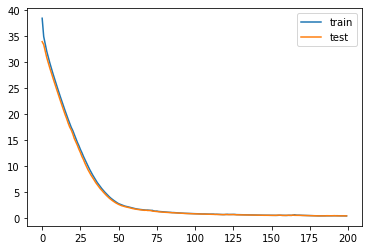

In [101]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [102]:
#confusion Matrix
train_predicted=saved_model.predict(trainX)
test_predicted=saved_model.predict(testX)

#Confusion Matrix for Training
from sklearn import metrics
confusion = metrics.confusion_matrix(trainy.argmax(axis=1), train_predicted.argmax(axis=1))
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(trainy.argmax(axis=1), train_predicted.argmax(axis=1)))

#Confusion Matrix for Testing
from sklearn import metrics
confusion1 = metrics.confusion_matrix(testy.argmax(axis=1), test_predicted.argmax(axis=1))
print(confusion1)

# Let's check the overall accuracy.
print(metrics.accuracy_score(testy.argmax(axis=1), test_predicted.argmax(axis=1)))

[[343   0   0   0]
 [  0 343   6   0]
 [  0  14 332   1]
 [  1   0   1 359]]
0.9835714285714285
[[156   0   1   0]
 [  0 149   2   0]
 [  1   6 145   1]
 [  1   0   0 138]]
0.98


In [103]:
FP = confusion1.sum(axis=0) - np.diag(confusion1)  
FN = confusion1.sum(axis=1) - np.diag(confusion1)
TP = np.diag(confusion1)
TN = confusion1.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print(TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC)

[0.99363057 0.98675497 0.94771242 0.99280576]
[0.99548533 0.98663697 0.99328859 0.9978308 ]
[0.995      0.98666667 0.98166667 0.99666667]


In [67]:
#################################################################################################################################
#################################################################################################################################
#################################################################################################################################

# Convolutional Neural Network

In [68]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
from sklearn.datasets import make_moons
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [69]:
#split Training and Testing
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

X , y = dataframe1.loc[:, dataframe1.columns != 'Room'] ,dataframe1.loc[:, dataframe1.columns == 'Room']
trainX, testX, trainy, testy = train_test_split(X, y, random_state = 0,train_size = 0.7, test_size = 0.3)


In [70]:
ln=len(trainX.columns)

In [71]:
trainX=np.array(trainX)
trainy=np.array(trainy)
testy=np.array(testy)
testX=np.array(testX)


In [72]:
print(trainX.shape)

(1400, 7)


In [73]:
print(testX.shape)

(600, 7)


In [74]:
trainX = trainX.reshape(len(trainX),ln,1)
testX = testX.reshape(len(testX),ln,1)
trainy = trainy.reshape(len(trainy),1)
testy = testy.reshape(len(testy),1)
print(trainX.shape)
print(trainy.shape)

(1400, 7, 1)
(1400, 1)


In [75]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(trainy)
trainy = encoder.transform(trainy)
# convert integers to dummy variables (i.e. one hot encoded)
trainy = np_utils.to_categorical(trainy)

C:\Users\ved deo\Anaconda3\envs\deep\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ved deo\Anaconda3\envs\deep\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(testy)
testy = encoder.transform(testy)
# convert integers to dummy variables (i.e. one hot encoded)
testy = np_utils.to_categorical(testy)

In [77]:
# define model
model_cnn=Sequential()
model_cnn.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(250, activation='relu'))
model_cnn.add(Dense(4, activation='softmax'))

In [78]:
#compile model with SGD
from keras.optimizers import SGD
sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
model_cnn.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [79]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


In [80]:
# fit model
history = model_cnn.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=1, callbacks=[es, mc])



Train on 1400 samples, validate on 600 samples
Epoch 1/200
1400/1400 [==============================] - 0s 293us/step - loss: 223.2135 - accuracy: 0.2450 - val_loss: 1.3977 - val_accuracy: 0.2317
Epoch 2/200
 800/1400 [================>.............] - ETA: 0s - loss: 1.3908 - accuracy: 0.2375

C:\Users\ved deo\Anaconda3\envs\deep\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1400/1400 [==============================] - 0s 137us/step - loss: 1.3895 - accuracy: 0.2464 - val_loss: 1.3971 - val_accuracy: 0.2517
Epoch 3/200
1400/1400 [==============================] - 0s 98us/step - loss: 1.3970 - accuracy: 0.2614 - val_loss: 1.4038 - val_accuracy: 0.2317
Epoch 4/200
1400/1400 [==============================] - 0s 120us/step - loss: 1.3878 - accuracy: 0.2771 - val_loss: 1.3895 - val_accuracy: 0.2617
Epoch 5/200
1400/1400 [==============================] - 0s 214us/step - loss: 1.3924 - accuracy: 0.2357 - val_loss: 1.3968 - val_accuracy: 0.2317
Epoch 6/200
1400/1400 [==============================] - 0s 239us/step - loss: 1.3912 - accuracy: 0.2464 - val_loss: 1.3926 - val_accuracy: 0.2550
Epoch 7/200
1400/1400 [==============================] - 0s 156us/step - loss: 1.3937 - accuracy: 0.2393 - val_loss: 1.3932 - val_accuracy: 0.2550
Epoch 8/200
1400/1400 [==============================] - 0s 82us/step - loss: 1.3919 - accuracy: 0.2493 - val_loss: 1.3862 - val_ac

In [81]:
# load the saved model
#saved_model = load_model('best_model_cnn.h5')
saved_model = model_cnn

In [82]:
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 0.249, Test: 0.252


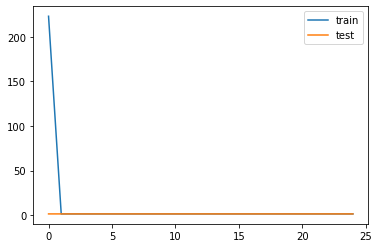

In [83]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [84]:
#Confusion Matrix
train_predicted=saved_model.predict(trainX)
test_predicted=saved_model.predict(testX)

#Confusion Matrix for Training
from sklearn import metrics
confusion = metrics.confusion_matrix(trainy.argmax(axis=1), train_predicted.argmax(axis=1))
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(trainy.argmax(axis=1), train_predicted.argmax(axis=1)))

#Confusion Matrix for Testing
from sklearn import metrics
confusion1 = metrics.confusion_matrix(testy.argmax(axis=1), test_predicted.argmax(axis=1))
print(confusion1)

# Let's check the overall accuracy.
print(metrics.accuracy_score(testy.argmax(axis=1), test_predicted.argmax(axis=1)))

[[  0 343   0   0]
 [  0 349   0   0]
 [  0 347   0   0]
 [  0 361   0   0]]
0.24928571428571428
[[  0 157   0   0]
 [  0 151   0   0]
 [  0 153   0   0]
 [  0 139   0   0]]
0.25166666666666665


In [85]:
FP = confusion1.sum(axis=0) - np.diag(confusion1)  
FN = confusion1.sum(axis=1) - np.diag(confusion1)
TP = np.diag(confusion1)
TN = confusion1.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print(TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC)

[0. 1. 0. 0.]
[1. 0. 1. 1.]
[0.73833333 0.25166667 0.745      0.76833333]


C:\Users\ved deo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\Users\ved deo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\Users\ved deo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


## With Regularization Parameter + Drop Out + ADAM

In [86]:
# define model
model_cnn_adm=Sequential()
model_cnn_adm.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l1(0.05)))
model_cnn_adm.add(MaxPooling1D(pool_size=2))
model_cnn_adm.add(Flatten())
model_cnn_adm.add(Dropout(0.6, noise_shape=None, seed=None))
model_cnn_adm.add(Dense(250, activation='relu'))
model_cnn_adm.add(Dense(4, activation='softmax'))

In [87]:
# Compiling Model
model_cnn_adm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
mc = ModelCheckpoint('best_model_cnn_reg.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


In [89]:
# fit model
history = model_cnn_adm.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=1, callbacks=[es, mc],batch_size=1024)



Train on 1400 samples, validate on 600 samples
Epoch 1/200
1400/1400 [==============================] - 0s 190us/step - loss: 18.6344 - accuracy: 0.2436 - val_loss: 8.0984 - val_accuracy: 0.2667
Epoch 2/200
1400/1400 [==============================] - 0s 11us/step - loss: 10.3391 - accuracy: 0.2764 - val_loss: 5.1312 - val_accuracy: 0.2517
Epoch 3/200
1400/1400 [==============================] - 0s 12us/step - loss: 7.4939 - accuracy: 0.2571 - val_loss: 4.6295 - val_accuracy: 0.2450
Epoch 4/200
1400/1400 [==============================] - 0s 11us/step - loss: 7.0890 - accuracy: 0.2743 - val_loss: 5.4903 - val_accuracy: 0.2317
Epoch 5/200
1400/1400 [==============================] - 0s 11us/step - loss: 7.3386 - accuracy: 0.2707 - val_loss: 4.6145 - val_accuracy: 0.2333
Epoch 6/200
1400/1400 [==============================] - 0s 12us/step - loss: 6.3124 - accuracy: 0.3071 - val_loss: 3.2699 - val_accuracy: 0.2967
Epoch 7/200
1400/1400 [==============================] - 0s 11us/step - lo

C:\Users\ved deo\Anaconda3\envs\deep\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1400/1400 [==============================] - 0s 24us/step - loss: 3.4540 - accuracy: 0.4257 - val_loss: 2.0071 - val_accuracy: 0.7100
Epoch 11/200
1400/1400 [==============================] - 0s 33us/step - loss: 3.3742 - accuracy: 0.4421 - val_loss: 1.6897 - val_accuracy: 0.7383
Epoch 12/200
1400/1400 [==============================] - 0s 14us/step - loss: 2.6629 - accuracy: 0.4664 - val_loss: 1.3618 - val_accuracy: 0.7433
Epoch 13/200
1400/1400 [==============================] - 0s 13us/step - loss: 2.3090 - accuracy: 0.5114 - val_loss: 1.3399 - val_accuracy: 0.6433
Epoch 14/200
1400/1400 [==============================] - 0s 18us/step - loss: 2.3036 - accuracy: 0.5021 - val_loss: 1.4855 - val_accuracy: 0.4950
Epoch 15/200
1400/1400 [==============================] - 0s 17us/step - loss: 2.2576 - accuracy: 0.5207 - val_loss: 1.5625 - val_accuracy: 0.5050
Epoch 16/200
1400/1400 [==============================] - 0s 16us/step - loss: 2.1263 - accuracy: 0.5393 - val_loss: 1.5377 - val_a

Epoch 66/200
1400/1400 [==============================] - 0s 21us/step - loss: 0.7886 - accuracy: 0.8600 - val_loss: 0.8696 - val_accuracy: 0.8067
Epoch 67/200
1400/1400 [==============================] - 0s 11us/step - loss: 0.8163 - accuracy: 0.8436 - val_loss: 0.8794 - val_accuracy: 0.8050
Epoch 68/200
1400/1400 [==============================] - 0s 11us/step - loss: 0.8163 - accuracy: 0.8329 - val_loss: 0.8847 - val_accuracy: 0.8017
Epoch 69/200
1400/1400 [==============================] - 0s 17us/step - loss: 0.7984 - accuracy: 0.8500 - val_loss: 0.8819 - val_accuracy: 0.8017
Epoch 70/200
1400/1400 [==============================] - 0s 11us/step - loss: 0.8120 - accuracy: 0.8429 - val_loss: 0.8594 - val_accuracy: 0.8183
Epoch 71/200
1400/1400 [==============================] - 0s 12us/step - loss: 0.7892 - accuracy: 0.8436 - val_loss: 0.8323 - val_accuracy: 0.8283
Epoch 72/200
1400/1400 [==============================] - 0s 20us/step - loss: 0.7663 - accuracy: 0.8564 - val_loss: 0

In [90]:
# load the saved model
#saved_model = load_model('best_model_cnn_reg.h5')
saved_model = model_cnn_adm

In [91]:
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 0.898, Test: 0.897


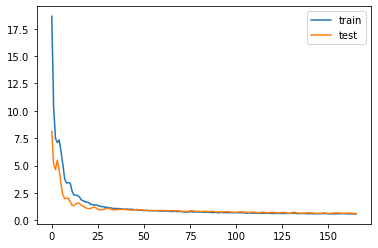

In [92]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [93]:
#Confusion Matrix
train_predicted=saved_model.predict(trainX)
test_predicted=saved_model.predict(testX)

#Confusion Matrix for Training
from sklearn import metrics
confusion = metrics.confusion_matrix(trainy.argmax(axis=1), train_predicted.argmax(axis=1))
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(trainy.argmax(axis=1), train_predicted.argmax(axis=1)))

#Confusion Matrix for Testing
from sklearn import metrics
confusion1 = metrics.confusion_matrix(testy.argmax(axis=1), test_predicted.argmax(axis=1))
print(confusion1)

# Let's check the overall accuracy.
print(metrics.accuracy_score(testy.argmax(axis=1), test_predicted.argmax(axis=1)))

[[306   0   4  33]
 [  0 344   5   0]
 [  4  59 246  38]
 [  0   0   0 361]]
0.8978571428571429
[[140   0   0  17]
 [  0 151   0   0]
 [  2  24 108  19]
 [  0   0   0 139]]
0.8966666666666666


In [94]:
FP = confusion1.sum(axis=0) - np.diag(confusion1)  
FN = confusion1.sum(axis=1) - np.diag(confusion1)
TP = np.diag(confusion1)
TN = confusion1.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print(TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC)

[0.89171975 1.         0.70588235 1.        ]
[0.99548533 0.94654788 1.         0.92190889]
[0.96833333 0.96       0.925      0.94      ]
